<a href="https://colab.research.google.com/github/husthorng/Backpropagation_NN/blob/husthorng-patch-1/ml_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(2.023, 2.827, 'Max. error:1.58%')

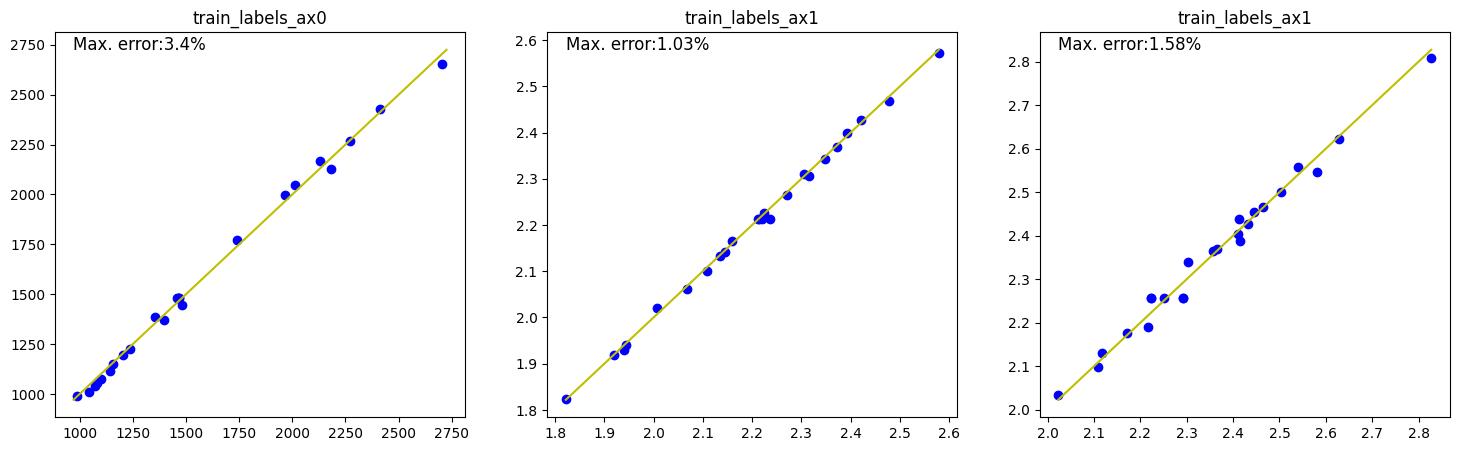

In [ ]:
# https://colab.research.google.com/drive/1vY3KFZdjv6mQT9EJihaNWy_kV6xyRafW#scrollTo=TVRJwE4VQl4T
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

numTag=3
urlsyn0 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/W1_wc.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
W1=syn0t[1:,1:]

urlsyn1 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/W2_wc.csv"
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
W2=syn1t[1:,1:]

#nOutputs=syn1.shape[1]
ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/max_min_Xi_wc.csv"
max_min_Xi = np.array(pd.read_csv(ur2,encoding='utf-8'))[:,1:]
max_min_T=np.append([max_min_Xi[0][4:]], [max_min_Xi[1][4:]], axis=0)

ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/wirecut.csv"
records = pd.read_csv(ur2,encoding='utf-8')

Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

ptp_Xi=np.ptp(max_min_Xi,axis=0)


from sklearn.model_selection import train_test_split
res = train_test_split(inputD, targetD,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data1, test_data1, train_labels1, test_labels1 = res

N_train_data=(train_data1 - max_min_Xi[1][:4])/ptp_Xi[:4]
N_train_labels=(train_labels1 - max_min_Xi[1][4:])/ptp_Xi[4:]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)
targetD3=N_train_labels

#inputD3_1=np.array([1. , 0. , 0.5, 0.5, 0.5])

net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(train_labels1[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "y")

ax1.scatter(train_labels1[:,1], out_o_V[:,1],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,1])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[2])
ax1.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "y")

ax1.scatter(train_labels1[:,2], out_o_V[:,2],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,2])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)